How an object is situated in space 
if we know how the object lies in the space, we can draw some 2D diagrams in it to simulate the 3D effect

find 
rotation and translation vectors


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

chessboardSize = (24,17)
frameSize = (1440,1080)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0]*chessboardSize[1],3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

print(objp)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('images/*.png')
for fname in images:
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, chessboardSize, None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)

[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  0.  0.]
 ...
 [21. 16.  0.]
 [22. 16.  0.]
 [23. 16.  0.]]


In [2]:
ret, cameraMatrix, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,frameSize,None,None)

print("camera calibrated: ",ret)
print("\nCamera matrix\n", cameraMatrix)
print("\nDistortion Parameters\n", dist)
print("\nrotational vectors\n", rvecs)
print("\ntranslation vectors\n", tvecs)

camera calibrated:  1.8562855738028041

Camera matrix
 [[1.17232635e+03 0.00000000e+00 7.42502162e+02]
 [0.00000000e+00 1.17209523e+03 5.90997158e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Parameters
 [[-0.24740003  0.14635807  0.00079243 -0.00039257 -0.081573  ]]

rotational vectors
 (array([[-1.39446966e-02],
       [ 1.27438283e-03],
       [-1.58772930e+00]]), array([[-0.01642824],
       [-0.00286532],
       [-1.59347947]]), array([[-0.01361592],
       [-0.00132749],
       [ 0.03738717]]), array([[-0.00782643],
       [-0.00045227],
       [ 0.00117428]]), array([[-0.00472004],
       [-0.00206095],
       [-0.01960003]]), array([[-0.01055473],
       [ 0.00135928],
       [ 0.02070906]]), array([[-0.00772694],
       [ 0.00778677],
       [ 0.02864928]]), array([[-0.01017639],
       [ 0.00752831],
       [ 0.00998126]]), array([[-0.01571768],
       [ 0.00012737],
       [-0.04090067]]), array([[-0.00755782],
       [ 0.0006851 ],
       [ 0.01628382]])

In [3]:
def draw(img, corners, imgpts):

    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 10)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 10)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 10)

    return img

In [4]:
def drawBoxes(img, corners, imgpts):

    imgpts = np.int32(imgpts).reshape(-1,2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)

    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)

    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)

    return img

 We draw axis of length 3 (units will be in terms of chess square size since we calibrated based on that size). So our X axis is drawn from (0,0,0) to (3,0,0), so for Y axis. For Z axis, it is drawn from (0,0,0) to (0,0,-3). Negative denotes it is drawn towards the camera.

In [5]:

objp = np.zeros((chessboardSize[0]*chessboardSize[1],3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)
axis = np.float32([[3,0,0], [0,3,0],[0,0,-3]]).reshape(-1,3)
axisBoxes = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])


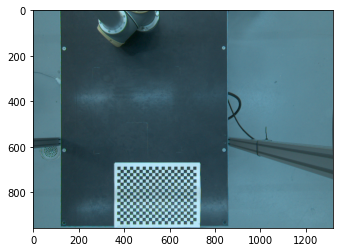

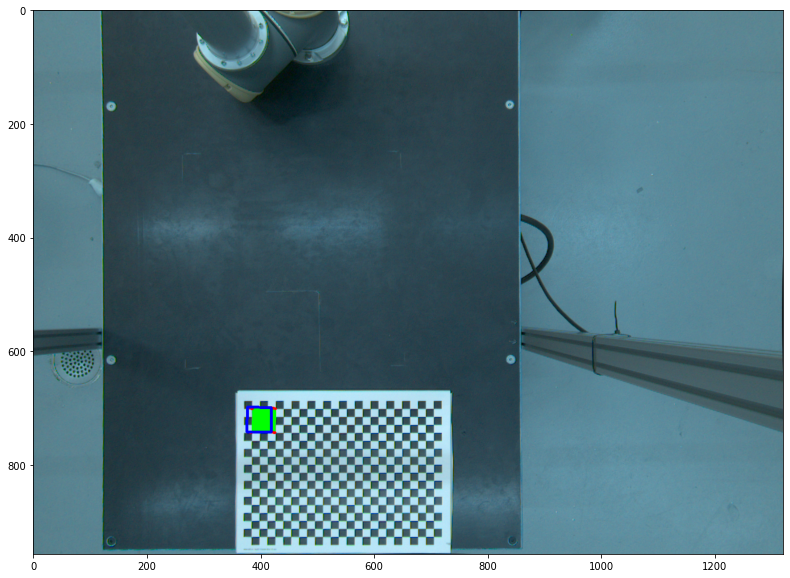

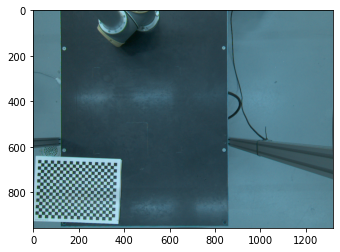

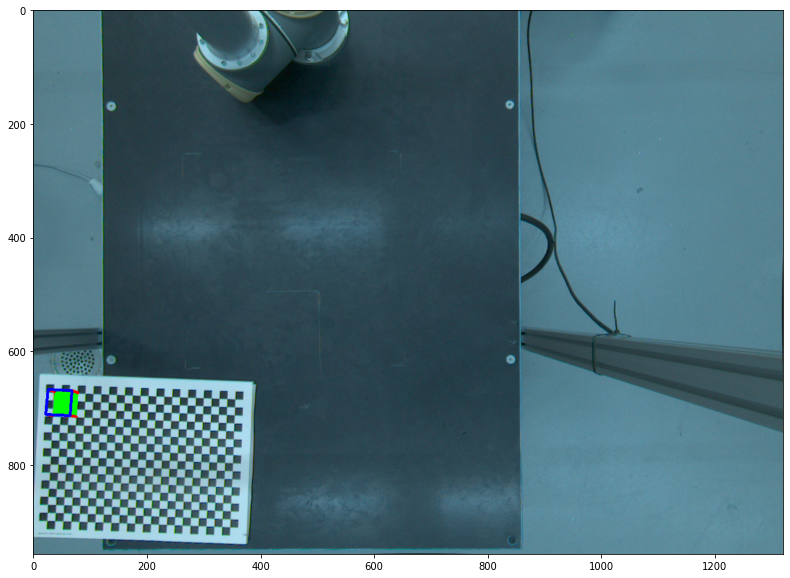

In [6]:
for image in glob.glob('undistorted*.png'):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.show()

    ret, corners = cv2.findChessboardCorners(gray,chessboardSize,None)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret, rvecs, tvecs = cv2.solvePnP(objp, corners2, cameraMatrix, dist)

        # Project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axisBoxes, rvecs, tvecs, cameraMatrix, dist)

        img = drawBoxes(img,corners2,imgpts)
        plt.figure(figsize=(20,10))
        plt.imshow(img)
        plt.show()
